<a href="https://colab.research.google.com/github/ObaidUllah2000/Data-Insights/blob/main/netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysis

In [ ]:
import numpy as np   # perform mathematical operations
import pandas as pd   # dealing with dataset
import seaborn as sns   # for visualization
import matplotlib.pyplot as plt  # for visualization
import plotly.graph_objects as go
import plotly.express as px   # for visualization

from termcolor import colored  

import warnings   # ignoring the warnings 
warnings.filterwarnings("ignore")
# shift + enter to run the code


In [ ]:
#Loading and reading dataset
df = pd.read_csv("/content/netflix_titles.csv")   #reading the csv file
df_tv = df[df["type"] == "TV Show"]        #selecting  TV SHOWS row data from column "type"
df_movies = df[df["type"] == "Movie"]
# df.tail(5)
# df.head(5)  #reads the first 5 rows of the dataset 
df.info()  #brief info of the csv file

# df_yr_19=df[df["release_year"] == 2019]
# df_yr_19.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
#Print count of rows and columns { df.shape returns the tuple with dimensionality of the dataFrame }
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))
df.shape  #outputs the shape of dataset

There are 6234 rows and 12 columns in the dataset.


(6234, 12)

In [ ]:
#adding columns to the dataframe :

df["date_added"] = pd.to_datetime(df['date_added']) 
#we are converting the datatype of the column date_added from object to datetime
# type(df["date_added"][0])
df["date_added"].head()

0   2019-09-09
1   2016-09-09
2   2018-09-08
3   2018-09-08
4   2017-09-08
Name: date_added, dtype: datetime64[ns]

In [ ]:
df['month_added']=df['date_added'].dt.month    # creates a new column named month_added
df['month_name_added']=df['date_added'].dt.month_name()   # creates a new column named month_name_added
df['year_added'] = df['date_added'].dt.year   # creates a new column named year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6234 non-null   int64         
 1   type              6234 non-null   object        
 2   title             6234 non-null   object        
 3   director          4265 non-null   object        
 4   cast              5664 non-null   object        
 5   country           5758 non-null   object        
 6   date_added        6223 non-null   datetime64[ns]
 7   release_year      6234 non-null   int64         
 8   rating            6224 non-null   object        
 9   duration          6234 non-null   object        
 10  listed_in         6234 non-null   object        
 11  description       6234 non-null   object        
 12  month_added       6223 non-null   float64       
 13  month_name_added  6223 non-null   object        
 14  year_added        6223 n

In [ ]:
#To see the Rate of NULL values across all columns:
    
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :	
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))
# df.isnull()


director's null rate :31.58%
cast's null rate :9.14%
country's null rate :7.64%
date_added's null rate :0.18%
rating's null rate :0.16%
month_added's null rate :0.18%
month_name_added's null rate :0.18%
year_added's null rate :0.18%


In [ ]:
#To display the counts of respective value under a specified column
df['type'].value_counts()


# df.nunique()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [ ]:
#replace null values with any other value for a specific column:

df['country'].replace(np.nan, 'United States',inplace  = True)
df['cast'].replace(np.nan, 'No Data',inplace  = True)


In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :	
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

director's null rate :31.58%
date_added's null rate :0.18%
rating's null rate :0.16%
month_added's null rate :0.18%
month_name_added's null rate :0.18%
year_added's null rate :0.18%


##Visualization

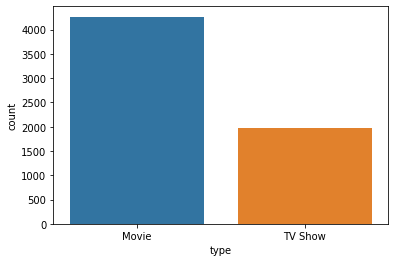

In [ ]:
#CountPlot :

# sns.countplot(x='year',data = df)

sns.countplot(x='type',data = df)

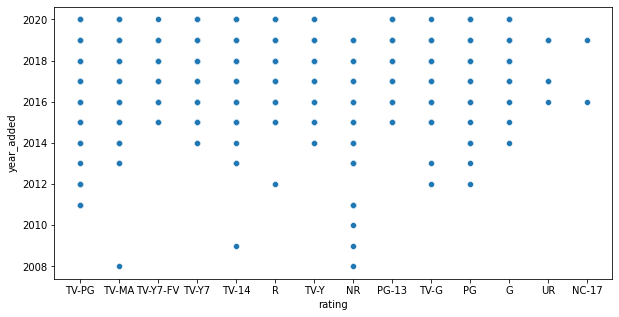

In [ ]:
#Scatter Plot:
plt.figure(figsize=(10,5))
sns.scatterplot(x='rating',y='year_added',data = df) #analysing the type, whether its a movie or a movie v/s the rating it has


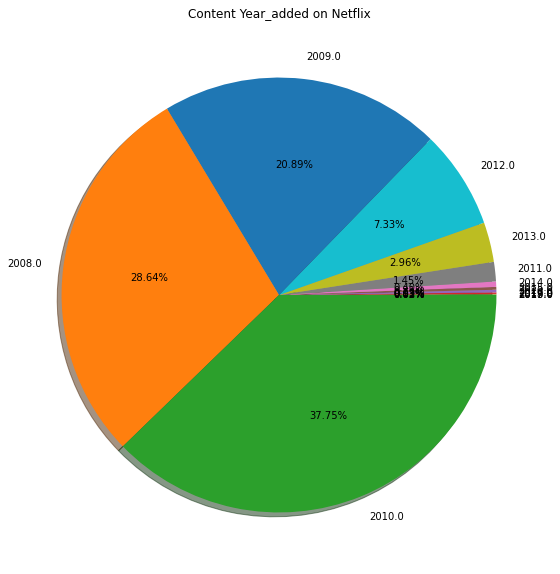

In [ ]:
#Content type on Netflix: { df['type'].value_counts().index  --> gives the different types of content over Netflix }

# plt.figure(figsize=(10,5))
# plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.1,0],
#         autopct='%1.2f%%',colors=['Green','grey'], shadow=True)
# plt.title('Content type on Netflix')
# plt.show()
plt.figure(figsize=(18,10))
plt.pie(df['year_added'].value_counts().sort_values(),labels=df['year_added'].value_counts().index,
        autopct='%1.2f%%', shadow=True)
plt.title('Content Year_added on Netflix')
plt.show()

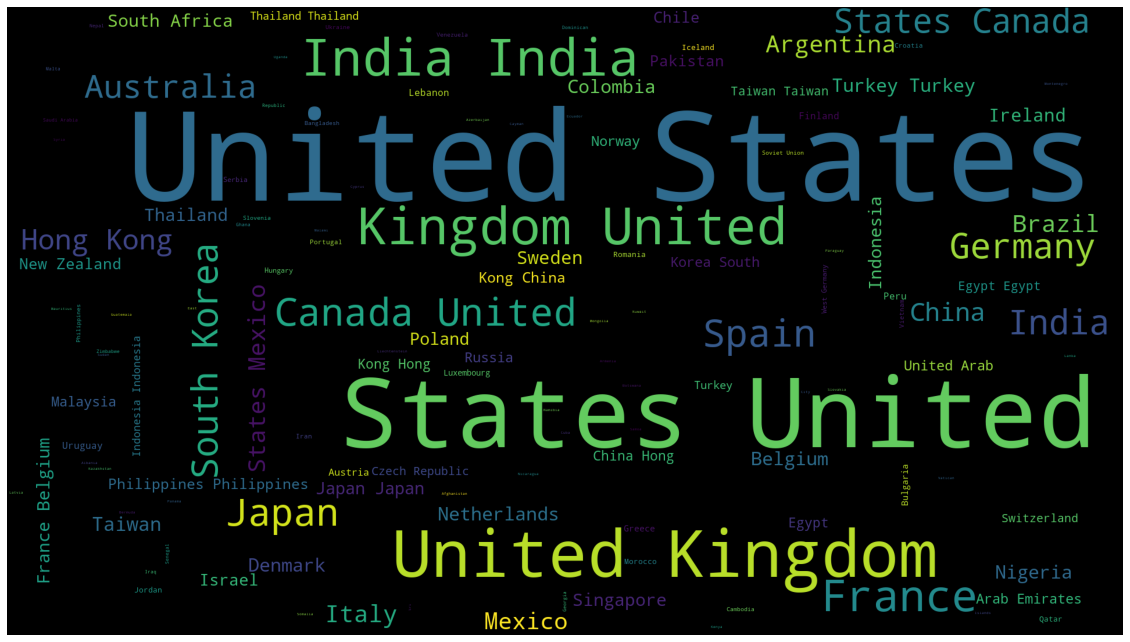

In [ ]:
#Word Cloud

from wordcloud import WordCloud

plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()


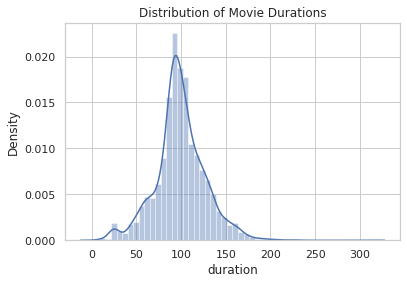

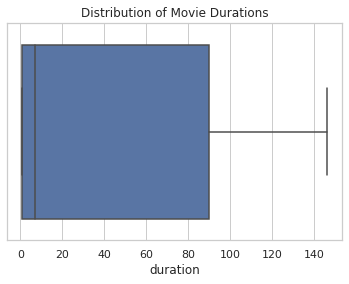

In [ ]:
def to_minutes(series): #function to return only the first element
    return series.split()[0]
df[df.type == 'Movie'].duration.head()
df['duration'] = df.duration.apply(lambda x: to_minutes(x))   #converting string to integer for visualization process
df['duration'] = df.duration.astype('int')
df[df.type == 'Movie'].duration.mean()
sns.set(style='whitegrid')

#Distribution_plot
sns.distplot(df[df.type == 'Movie'].duration).set_title('Distribution of Movie Durations')
plt.show()

#BoxPlot
sns.boxplot(df[df.country == 'United Kingdom'].duration).set_title('Distribution of Movie Durations')
plt.show()



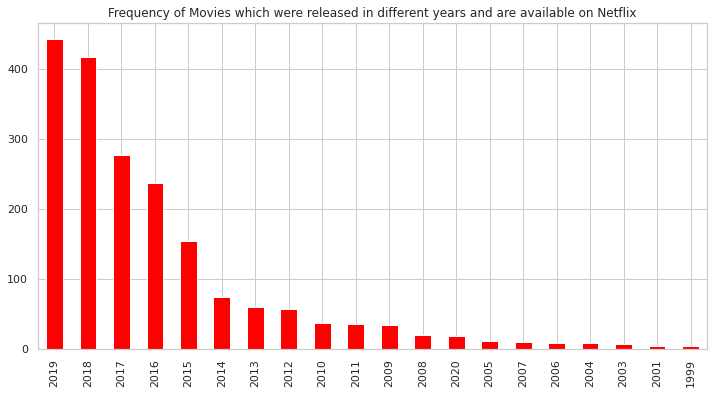

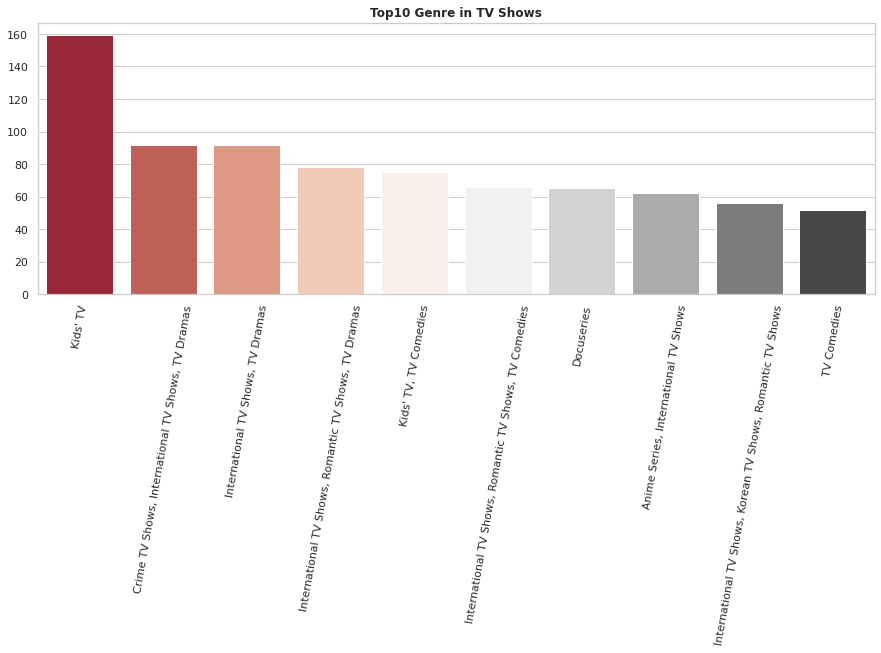

In [ ]:
#Top-20 countries producing most contents { Bar Plot }:

country_counter=df['country'].value_counts().sort_values(ascending=False) #countries with the most rated content
country_counter=pd.DataFrame(country_counter)
top20country=country_counter[0:21]
top20country

plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")


#Top 10 Genre available in TV show

plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()
